# Final Data Visualization Project
---

Course: Data Visualization

Submission Date: Mar 28, 2022

Student: Mathias Schindler

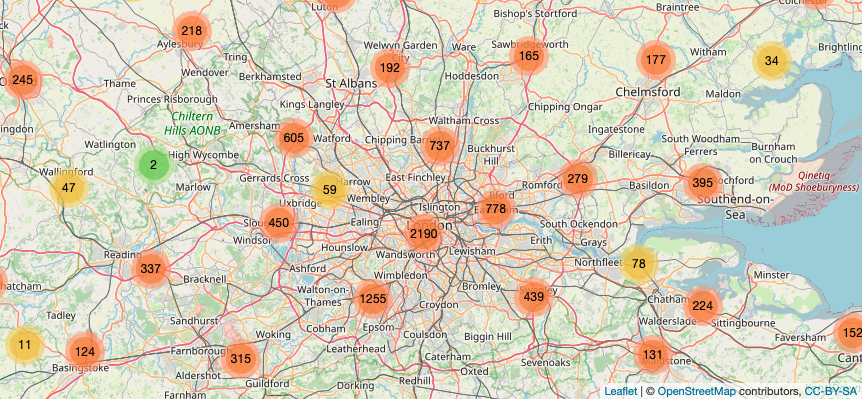

# Preamble

In [28]:
# Set R console language to English
Sys.setenv(LANG = "en")

The versions of packages used when this script originallay was developed in `R`version 4.12 are
- `plyr`: 1.8.6
- `dplyr`: 1.0.8
- `ggplot2`: 3.3.5
- `ggpubr`: 0.4.0
- `rgdal`: 1.5.28
- `geojsonio`: 0.9.4
- `lubridate`: 1.8.0
- `cowplot`: 1.1.1
- `leaflet`: 2.0.4.1
- `reshape`: 0.8.8
- `raster`: 3.5.15
- `RColorBrewer`: 1.1.2

In [29]:
# Load packages
library(plyr)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(rgdal)
library(geojsonio)
library(lubridate)
library(cowplot)
library(leaflet)
library(reshape)
library(raster)
library(RColorBrewer)

In [30]:
print("Versions installed on the computer running this script:")
paste("Package version of plyr:", packageVersion("plyr"))
paste("Package version of dplyr:", packageVersion("dplyr"))
paste("Package version of ggplot2:", packageVersion("ggplot2"))
paste("Package version of ggpubr:", packageVersion("ggpubr"))
paste("Package version of rgdal:", packageVersion("rgdal"))
paste("Package version of geojsonio:", packageVersion("geojsonio"))
paste("Package version of lubridate:", packageVersion("lubridate"))
paste("Package version of cowplot:", packageVersion("cowplot"))
paste("Package version of leaflet:", packageVersion("leaflet"))
paste("Package version of reshape:", packageVersion("reshape"))
paste("Package version of raster:", packageVersion("raster"))
paste("Package version of RColorBrewer:", packageVersion("RColorBrewer"))

[1] "Versions installed on the computer running this script:"


[1] "Package version of plyr: 1.8.6"

[1] "Package version of dplyr: 1.0.8"

[1] "Package version of ggplot2: 3.3.5"

[1] "Package version of ggpubr: 0.4.0"

[1] "Package version of rgdal: 1.5.28"

[1] "Package version of geojsonio: 0.9.4"

[1] "Package version of lubridate: 1.8.0"

[1] "Package version of cowplot: 1.1.1"

[1] "Package version of leaflet: 2.0.4.1"

[1] "Package version of reshape: 0.8.8"

[1] "Package version of raster: 3.5.15"

[1] "Package version of RColorBrewer: 1.1.2"

In [31]:
R.Version()

$platform
[1] "x86_64-apple-darwin13.4.0"

$arch
[1] "x86_64"

$os
[1] "darwin13.4.0"

$system
[1] "x86_64, darwin13.4.0"

$status
[1] ""

$major
[1] "4"

$minor
[1] "1.2"

$year
[1] "2021"

$month
[1] "11"

$day
[1] "01"

$`svn rev`
[1] "81115"

$language
[1] "R"

$version.string
[1] "R version 4.1.2 (2021-11-01)"

$nickname
[1] "Bird Hippie"

In [32]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur 10.16

Matrix products: default
BLAS/LAPACK: /Users/mathiasschindler/opt/anaconda3/envs/dataviz/lib/libopenblasp-r0.3.18.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] RColorBrewer_1.1-2 raster_3.5-15      reshape_0.8.8      leaflet_2.0.4.1   
 [5] cowplot_1.1.1      lubridate_1.8.0    geojsonio_0.9.4    rgdal_1.5-28      
 [9] sp_1.4-6           ggpubr_0.4.0       ggplot2_3.3.5      dplyr_1.0.8       
[13] plyr_1.8.6        

loaded via a namespace (and not attached):
 [1] tidyr_1.2.0        jsonlite_1.8.0     carData_3.0-5      assertthat_0.2.1  
 [5] pillar_1.7.0       backports_1.4.1    lattice_0.20-45    glue_1.6.2        
 [9] uuid_1.0-3         digest_0.6.29      ggsignif_0.6.3     colorspace_2.0-3  
[13] htmltools_0.5.2    pkgconfig_2.0.3    httpcode_0.3.0     

# Load Data

Data documentation below from [https://www.gov.uk/guidance/about-the-price-paid-data#explanations-of-column-headers-in-the-ppd](https://www.gov.uk/guidance/about-the-price-paid-data#explanations-of-column-headers-in-the-ppd):

| Column        | Are           
| ------------- |:-------------:
| Transaction unique identifier | A reference number which is generated automatically recording each published sale. The number is unique and will change each time a sale is recorded.
| Price      | Sale price stated on the transfer deed.      
| Date of Transfer	 | Date when the sale was completed, as stated on the transfer deed    
| Postcode | This is the postcode used at the time of the original transaction. Note that postcodes can be reallocated and these changes are not reflected in the Price Paid Dataset.   
| Property Type      | D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other. Note that: (i) we only record the above categories to describe property type, we do not separately identify bungalow, (ii) end-of-terrace properties are included in the Terraced category above , (iii) ‘Other’ is only valid where the transaction relates to a property type that is not covered by existing values, for example where a property comprises more than one large parcel of land      
| Old/New	 | Indicates the age of the property and applies to all price paid transactions, residential and non-residential. Y = a newly built property, N = an established residential building   
| Duration      | Relates to the tenure: F = Freehold, L= Leasehold etc. Note that HM Land Registry does not record leases of 7 years or less in the Price Paid Dataset.      
| PAON | Primary Addressable Object Name. Typically the house number or name   
| SAON      | Secondary Addressable Object Name. Where a property has been divided into separate units (for example, flats), the PAON (above) will identify the building and a SAON will be specified that identifies the separate unit/flat.      
| Street  |    
| Locality      |       
| Town/City      |       
| District | 
| County      |       
| PPD Category Type  | Indicates the type of Price Paid transaction. A = Standard Price Paid entry, includes single residential property sold for value. B = Additional Price Paid entry including transfers under a power of sale/repossessions, buy-to-lets (where they can be identified by a Mortgage), transfers to non-private individuals and sales where the property type is classed as ‘Other’. Note that category B does not separately identify the transaction types stated. HM Land Registry has been collecting information on Category A transactions from January 1995. Category B transactions were identified from October 2013.
| Record Status - monthly file only      | Indicates additions, changes and deletions to the records.(see guide below). A = Addition, C = Change, D = Delete. Note that where a transaction changes category type due to misallocation (as above) it will be deleted from the original category type and added to the correct category with a new transaction unique identifier.      

In [33]:
# Set path
path = "/Users/mathiasschindler/Library/Mobile Documents/com~apple~CloudDocs/BSE/_T2-Data Viz/FinalProject/data"

In [34]:
# Full dataset
# file = paste(path, "pp-complete.csv", sep = "/") 
# df = read.csv(file)
# head(df, 5)

# Subsample - when developing code / check code runs
file = paste(path, "ppdata_subs.csv", sep = "/") 
df = read.csv(file, na.strings=c("", " ", "NA"))
head(df, 5)

transaction_unique_identifier          price  date_of_transfer postcode
1 {24EDE89B-CC0D-4990-9CBB-08F4739C4674} 249950 2005-11-28 00:00 M27 0AG 
2 {4D84F030-6E32-4CA5-8F90-7C2EA2B517D6} 290000 2005-06-10 00:00 B73 5NX 
3 {2A289EA0-AB7A-CDC8-E050-A8C063054829} 140000 2002-05-30 00:00 LL75 8BQ
4 {6A9B863E-623E-4D5B-9DF9-F17C96F58EB1} 150000 2005-08-05 00:00 L31 4JW 
5 {BF469C5B-4F9A-4A1C-9B00-BB4F44F66BB2} 116000 2004-10-19 00:00 IP3 0NH 
  property_type old_new duration PAON         SAON street         
1 T             N       F        304          NA   WORSLEY ROAD   
2 S             N       F        66           NA   EASTERN ROAD   
3 D             N       F        BANGOR HOUSE NA   NA             
4 S             N       L        13           NA   BLACKHURST ROAD
5 S             N       F        81           NA   LEVINGTON ROAD 
  locality         town_city        district         county            
1 SWINTON          MANCHESTER       SALFORD          GREATER MANCHESTER
2 SUTTON COLDFIELD SUTTON COLDFIELD BIRMINGHAM       WEST MIDLANDS     
3 NA               PENTRAETH        ISLE OF ANGLESEY ISLE OF ANGLESEY  
4 LYDIATE          LIVERPOOL        SEFTON           MERSEYSIDE        
5 IPSWICH          IPSWICH          IPSWICH          SUFFOLK           
  PPD_category_type record_status
1 A                 A            
2 A                 A            
3 A                 A            
4 A                 A            
5 A                 A

# A. Exploratory Analysis

## A1. Boxplots

<ins>Instructions</ins>
<br/>
"*For the 33 London boroughs create a box-plot (or several box-plots) that compares house prices between the boroughs. Can you think of a better way to compare borough house prices (please demonstrate)?*"

### A1.1 Prepare Data

I am creating a subset of the data `ppdata_subs.csv` with onlt the boroughs in London. Then this new dataframe will be used to create various boxplots / distribution plots in Sections A1.2 - A1.5. In order to compute distributions such as interquartile ranges it is important that there are multiple observations for each London borough group, which is also checked in the code below.

In [35]:
# Value counts of London boroughs / districts
lon_bors = df$district[df$town_city == "LONDON"]
table(lon_bors)

# Number of boroughs for London in dataset
print(paste("#London boroughs: ", length(table(lon_bors))))

lon_bors
  BARKING AND DAGENHAM                 BARNET                 BEXLEY 
                    18                  10350                    622 
                 BRENT                BROMLEY                 CAMDEN 
                  5697                   2049                   8085 
        CITY OF LONDON    CITY OF WESTMINSTER                CROYDON 
                   845                  11996                   3287 
                EALING                ENFIELD          EPPING FOREST 
                  7581                   6277                     45 
             GREENWICH                HACKNEY HAMMERSMITH AND FULHAM 
                  9751                   7055                   8303 
              HARINGEY                 HARROW               HAVERING 
                  8718                      4                      1 
            HILLINGDON               HOUNSLOW              ISLINGTON 
                     2                   1827                   7491 
KENSINGTON 

[1] "#London boroughs:  33"


There are 33 distinct boroughs for London with variable `district` so it is the correct variable per the instructions.

In [36]:
# Subset dataframe to only London districts
df_lon = subset(df, 
                subset = town_city == "LONDON",
                select = c("price", "district", "town_city"))

In [37]:
# Value counts
df_lon %>% count(district, sort = TRUE)

# Deleting HARROW, HILLINGDON, HAVERING as these have <5 observations
df_lon <- df_lon %>% filter(district != 'HARROW' & district != 'HILLINGDON' & district != 'HAVERING')

district               n    
1  WANDSWORTH             17453
2  LAMBETH                12509
3  CITY OF WESTMINSTER    11996
4  TOWER HAMLETS          10807
5  LEWISHAM               10795
6  SOUTHWARK              10618
7  BARNET                 10350
8  GREENWICH               9751
9  WALTHAM FOREST          9714
10 NEWHAM                  8982
11 HARINGEY                8718
12 KENSINGTON AND CHELSEA  8677
13 HAMMERSMITH AND FULHAM  8303
14 CAMDEN                  8085
15 EALING                  7581
16 ISLINGTON               7491
17 HACKNEY                 7055
18 ENFIELD                 6277
19 BRENT                   5697
20 MERTON                  5619
21 CROYDON                 3287
22 REDBRIDGE               2107
23 BROMLEY                 2049
24 RICHMOND UPON THAMES    2009
25 HOUNSLOW                1827
26 CITY OF LONDON           845
27 BEXLEY                   622
28 KINGSTON UPON THAMES     106
29 EPPING FOREST             45
30 BARKING AND DAGENHAM      18
31 HARROW                     4
32 HILLINGDON                 2
33 HAVERING                   1

In [38]:
# Check only London is present
print(paste("Unique values in 'town_city': ", unique(df_lon$town_city)))

# Double-check no. of boroughs
print(paste("Unique values in 'district': ", length(table(df_lon$district))))

# How many observations for London? 
print(paste("Dimensions of dataframe:", dim(df_lon))) #199,400

[1] "Unique values in 'town_city':  LONDON"
[1] "Unique values in 'district':  30"
[1] "Dimensions of dataframe: 199393" "Dimensions of dataframe: 3"     


### A1.2 Naïve Boxplot

Below, I demonstrate the simplest form of boxplots from the subsetted dataframe `df_lon` (containing only observations in London city. The bar in the middle of each box shows the median house price, upper and lower limits of the boxes are 75th and 25th percentiles, respectively. Means are also plottet on top (as triangles) to show how skewed the distributions are in borough. I have chose not to display outliers as to not clutter the plot.
<br>
From the boxplot below it is seen that the borough with highest median house price is *Kensington and Chelsea* with a median house price of 450,000 GBP. The second-highest and third-highest median house prices are the boroughs, *Richmond Upon Thames* and *City of Westminster*, respectively. The three lowest-priced boroughs are *Croydon*,  *Bexley*, and *Barking and Dagenham* in descending order.
<br>
The big caveat with boxplots in general is that they hide the underlying distributions. This can be overcome with a different type of plot such as the violin plot in Sectino 1.3 or adding jitters on top of boxplots as in Section 1.4.

In [39]:
# Set global plot options
options(repr.plot.width=16, repr.plot.height=7)
global_size = 14

Warning message:
“Removed 5988 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 5988 rows containing non-finite values (stat_summary).”
Warning message in prettyNum(.Internal(format(x, trim, digits, nsmall, width, 3L, :
“'big.mark' and 'decimal.mark' are both '.', which could be confusing”


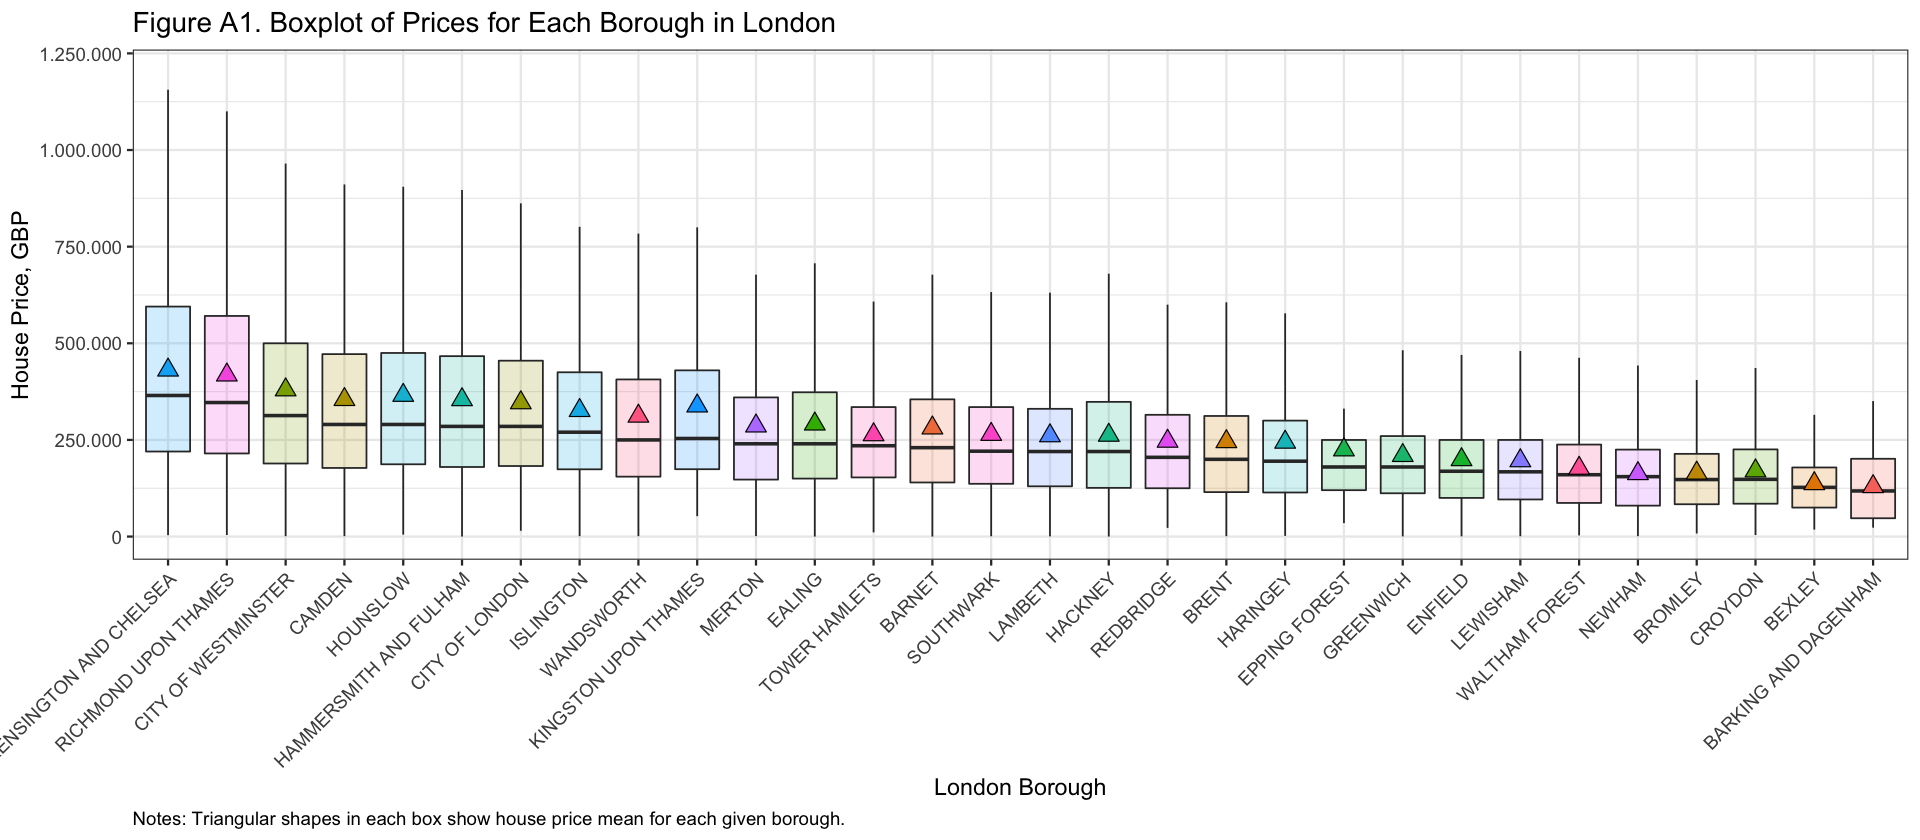

In [40]:
# Make boxplot
ggplot(df_lon, aes(x = as.factor(reorder(district, -price, na.rm = FALSE, FUN = median)), 
                   y = price, 
                   fill = district)) + 
    geom_boxplot(alpha = 0.2,
                outlier.shape = NA) + 
    stat_summary(fun=mean, geom="point", shape=24, size=4) +
    scale_y_continuous(labels = function(x) format(x, big.mark = ".", scientific = FALSE),
                       limits = c(0,1200000)) +
    scale_x_discrete(guide = guide_axis(angle = 45)) +
    xlab("London Borough") +
    ylab("House Price, GBP") +
    ggtitle("Figure A1. Boxplot of Prices for Each Borough in London") + 
    labs(caption = "Notes: Triangular shapes in each box show house price mean for each given borough.") +
    theme_bw(base_size = global_size) +
    theme(legend.position = "none", plot.caption = element_text(hjust = 0)) 

### A1.3 Violin Plot

Below is illustrated a violin plot for housing prices in London boroughs. Violin plots show the distribution in addition to 25th, 50th and 75th percentile. Wider violins show that housing prices are more concentrated around the median (given that the "wideness" is around the median). Hence, it is seen that housing prices in boroughs such as *Greenwich*, *Newham* and *Waltham Forest* are more centered around the median. Boroughs such as *Kensington and Chelsea*, *Richmond Upon Thames* and *Hounslow* are less centered around the median. This is supposedly due to the fact that they have some very expensive houses.

In [41]:
# Set global plot options
options(repr.plot.width=25, repr.plot.height=7)

global_size = 14

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

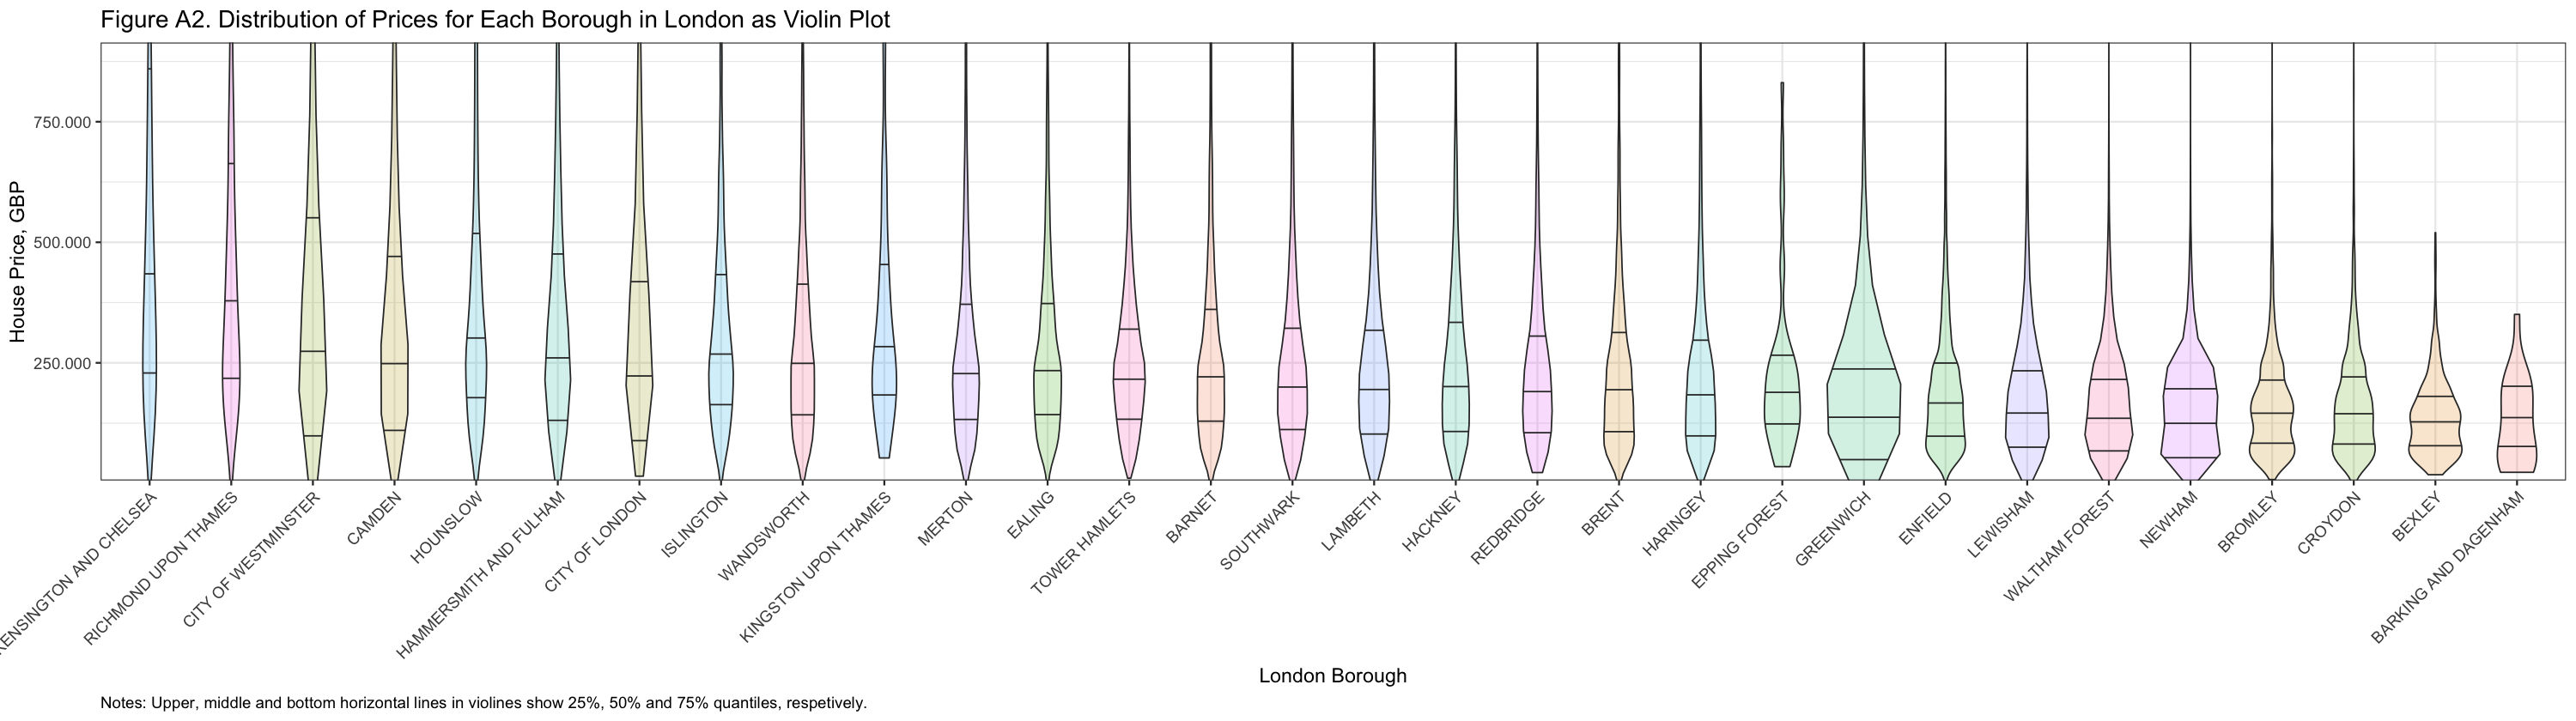

In [42]:
# Ad hoc code to set variables for y-axis limits in violin plot below
ylims <- df_lon %>%
    group_by(district) %>%
    summarise(Q1 = quantile(price, 1/4), Q3 = quantile(price, 3/4)) %>%
    ungroup() %>%
    #get lowest Q1 and highest Q3
    summarise(lowQ1 = min(Q1), highQ3 = max(Q3))

# Make violin plot
ggplot(df_lon, aes(x = as.factor(reorder(district, -price, na.rm = FALSE, FUN = median)), 
                   y = price, fill = district)) + 
    geom_violin(alpha = 0.2,
               draw_quantiles = c(0.25, 0.5, 0.75)) + 
    scale_y_continuous(labels = function(x) format(x, big.mark = ".", scientific = FALSE)) +
    scale_x_discrete(guide = guide_axis(angle = 45)) +
    coord_cartesian(ylim = as.numeric(ylims)) +
    xlab("London Borough") +
    ylab("House Price, GBP") +
    ggtitle("Figure A2. Distribution of Prices for Each Borough in London as Violin Plot") +
    labs(caption = "Notes: Upper, middle and bottom horizontal lines in violines show 25%, 50% and 75% quantiles, respetively.") +
    theme_bw(base_size = global_size) +
    theme(legend.position = "none", plot.caption = element_text(hjust = 0)) 

### A1.4 Boxplot with Jitters

Another way (less ideal compared to violin plots) of visualizing distributions is to layer jitters on top of the boxplots to visualize point observations in addition to summary statistics. Figure A3 illustrates this. The points are drawn from a 7.5 pct. random sample of the `df_lon` data so do not necessarily give the best image of the distribution given that many observations are thrown away.

In [43]:
# Set global plot options
options(repr.plot.width=16, repr.plot.height=7)
global_size = 14

Warning message:
“Removed 2193 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 171 rows containing missing values (geom_point).”
Warning message in prettyNum(.Internal(format(x, trim, digits, nsmall, width, 3L, :
“'big.mark' and 'decimal.mark' are both '.', which could be confusing”


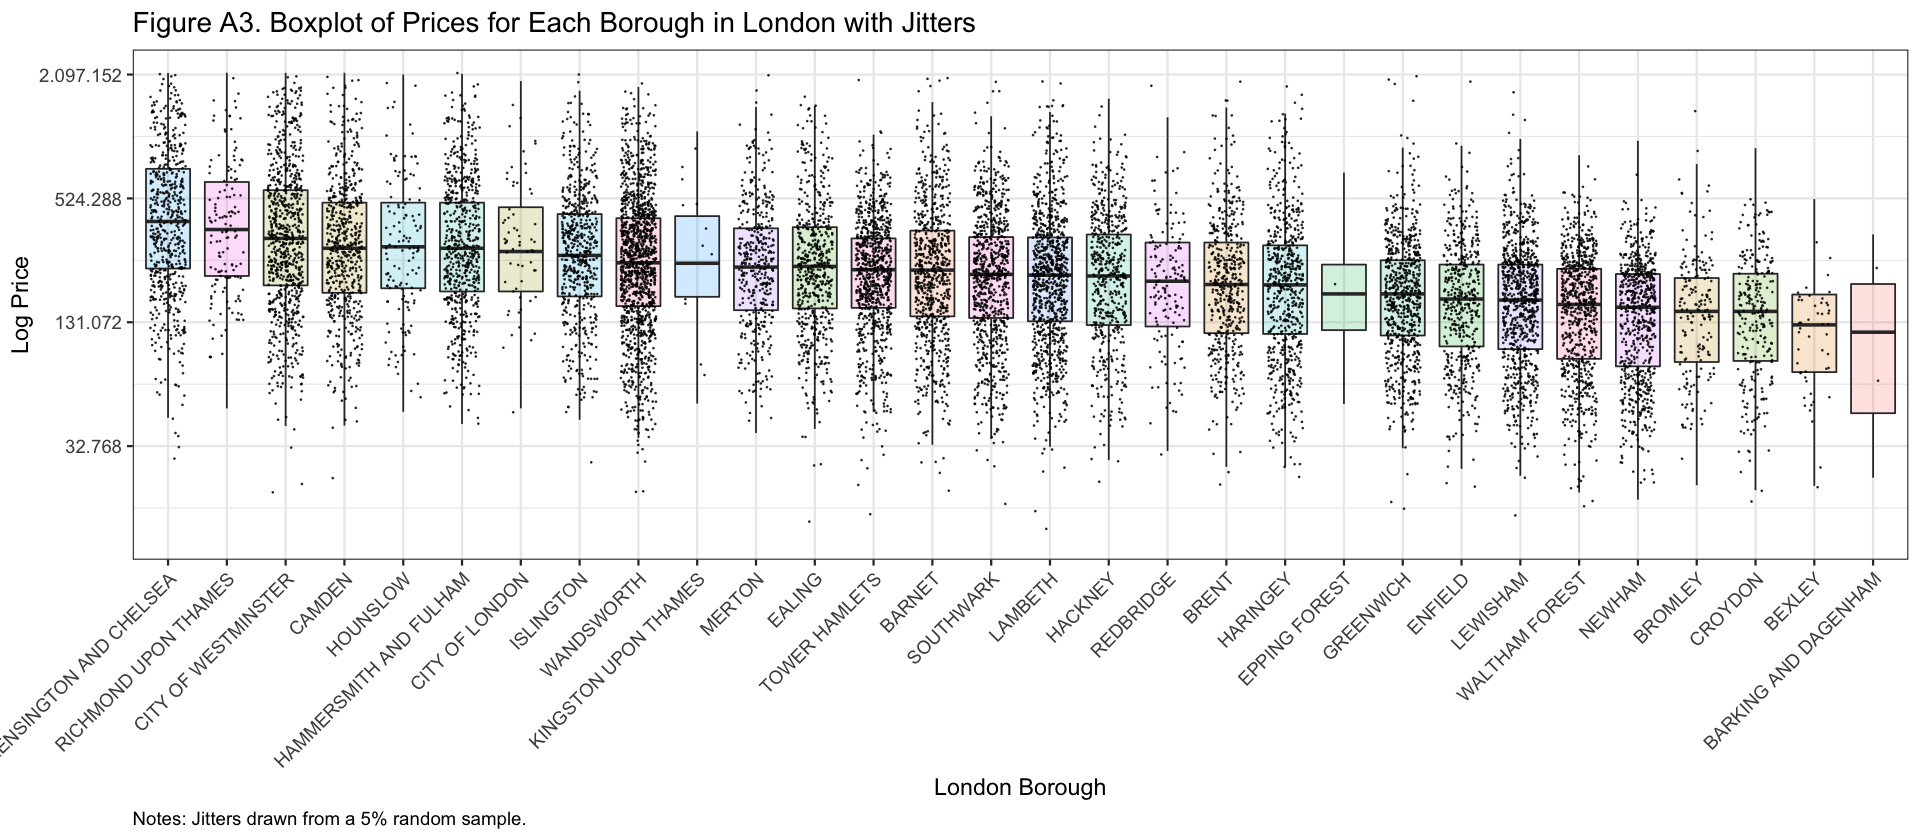

In [44]:
# Make boxplot with jitters
ggplot(df_lon, aes(x = as.factor(reorder(district, -price, na.rm = FALSE, FUN = median)), 
                   y = price, fill = district)) + 
    geom_boxplot(alpha = 0.2,
                outlier.shape = NA) + 
    geom_jitter(data = sample_frac(df_lon, size = 0.075),
                aes(x = factor(district), y = price, fill = NA), 
                size = 0.1, 
                alpha = 0.75,
                position = position_jitter(width = 0.3, height = 0.2),
                ) +
    scale_y_continuous(trans = 'log2', 
                       labels = function(x) format(x, big.mark = ".", scientific = FALSE),
                       limits = quantile(df_lon$price, c(0.001, 0.99))) +
    scale_x_discrete(guide = guide_axis(angle = 45)) +
    xlab("London Borough") +
    ylab("Log Price") +
    ggtitle("Figure A3. Boxplot of Prices for Each Borough in London with Jitters") + 
    labs(caption = "Notes: Jitters drawn from a 5% random sample.") +
    theme_bw(base_size = global_size) +
    theme(legend.position = "none", plot.caption = element_text(hjust = 0)) 

### A1.5 Violin Plot with Jitters

It is also possible to add jitters on top of violin plots. This, however, is a bit senseless as violin plots already inherently show the distribution of the data. It does give an insight into where this distribution is coming from as it shows singular point observations (again, drawn from a 7.5 pct. random sample).

Warning message:
“Removed 2193 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 166 rows containing missing values (geom_point).”
Warning message in prettyNum(.Internal(format(x, trim, digits, nsmall, width, 3L, :
“'big.mark' and 'decimal.mark' are both '.', which could be confusing”


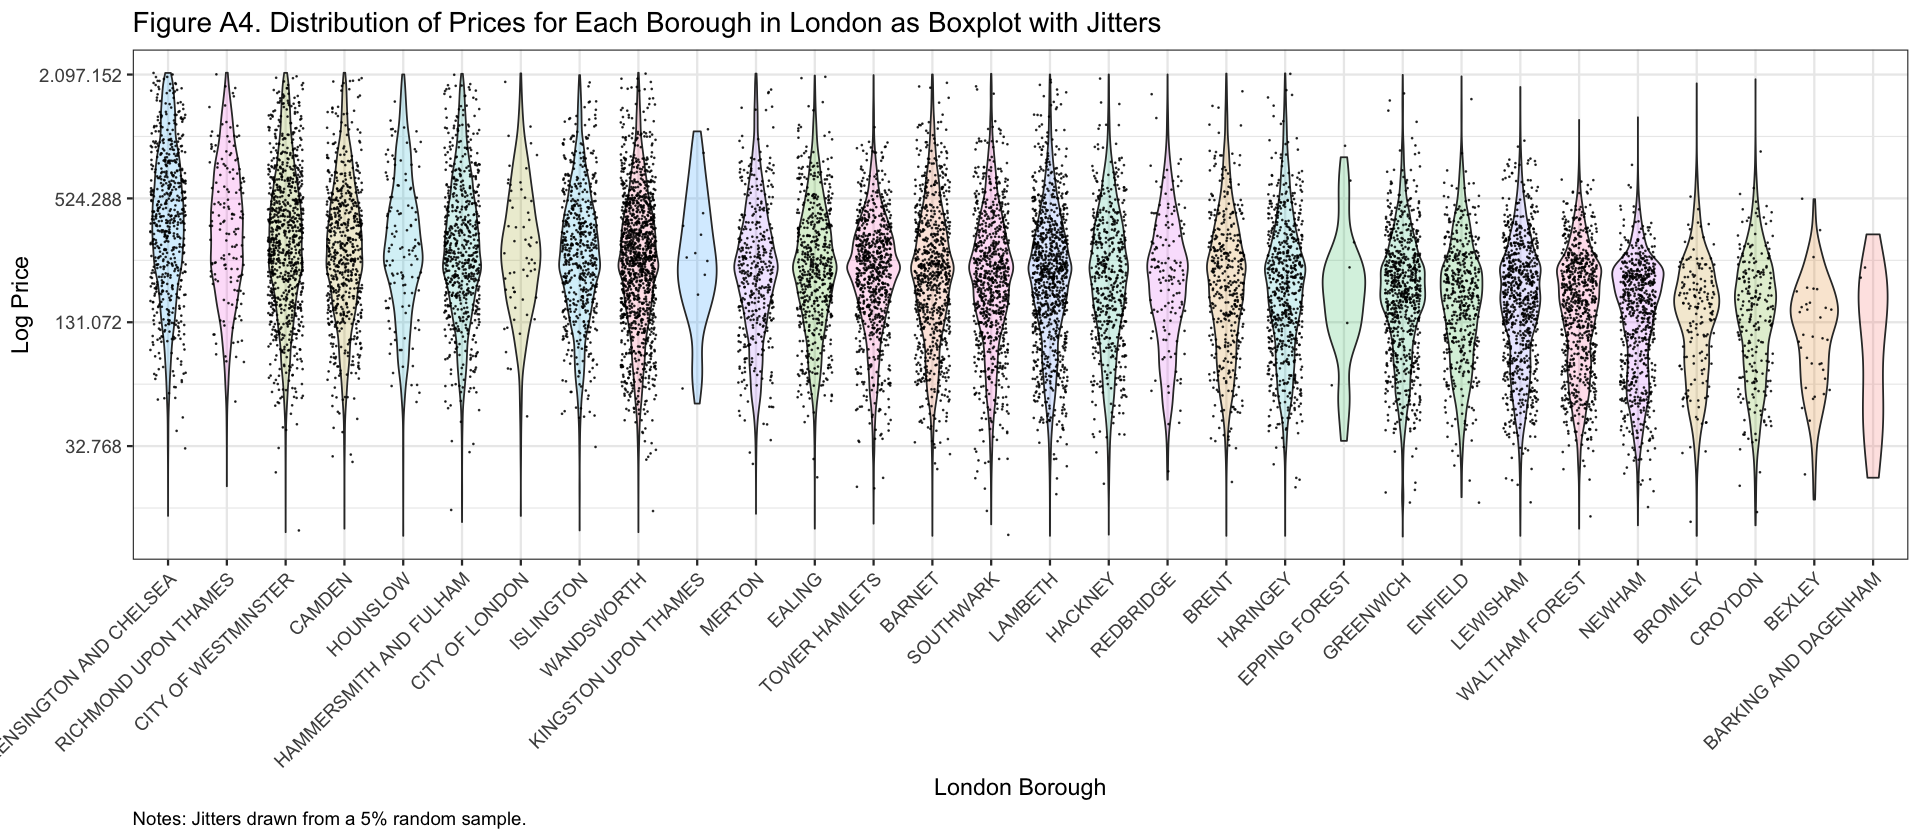

In [45]:
# Make boxplot with jitters
ggplot(df_lon, aes(x = as.factor(reorder(district, -price, na.rm = FALSE, FUN = median)), 
                   y = price, fill = district)) + 
    geom_violin(alpha = 0.2) + 
    geom_jitter(data = sample_frac(df_lon, size = 0.075),
                aes(x = factor(district), y = price, fill = NA), 
                size = 0.1, 
                alpha = 0.75,
                position = position_jitter(width = 0.3, height = 0.2),
                ) +
    scale_y_continuous(trans = 'log2', 
                       labels = function(x) format(x, big.mark = ".", scientific = FALSE),
                       limits = quantile(df_lon$price, c(0.001, 0.99))) +
    scale_x_discrete(guide = guide_axis(angle = 45)) +
    xlab("London Borough") +
    ylab("Log Price") +
    ggtitle("Figure A4. Distribution of Prices for Each Borough in London as Boxplot with Jitters") + 
    labs(caption = "Notes: Jitters drawn from a 5% random sample.") +
    theme_bw(base_size = global_size) +
    theme(legend.position = "none", plot.caption = element_text(hjust = 0)) 

## A2. Prices of Flats and Floor Level

<ins>Instructions</ins>
<br/>
"*Could the entire dataset be used to estimate the relationship between price of flats and floor level? If yes, how would you show that relationship in a plot?*"

### A2.1 Explore Dataset

We can use the variable `SAON` which in the documentation on the website [the website](https://www.gov.uk/guidance/about-the-price-paid-data#explanations-of-column-headers-in-the-ppd) is described as "Where a property has been divided into separate units (for example, flats), the [...] SAON will be specified that identifies the separate unit/flat". The variable has the following number of NaNs:

In [46]:
paste('Percentage of NaNs for "SAON" is ', 
      format(round(sum(is.na(df$SAON)) / nrow(df)*100, 2), nsmall = 2),
     "%")
paste('Absolute flats with "SAON" information:', nrow(df) - sum(is.na(df$SAON)))

[1] "Percentage of NaNs for \"SAON\" is  88.78 %"

[1] "Absolute flats with \"SAON\" information: 280476"

So the relationsship between prices and floor level can at maximum be done for 280,476 out of the 2,500,000 observations in the dataset. However many of the labels in `SAON` cannot be used to infer floor level without detailed knowledge about the housetype on each address. Below is presented the value counts for each label for non-missing values in `SAON`:

In [47]:
paste('Number of labels for non-NA "SAON":', length(unique(df$SAON)))
paste('Unique labels for non-NA "SAON":')
unique(df$SAON)

[1] "Number of labels for non-NA \"SAON\": 9108"

[1] "Unique labels for non-NA \"SAON\":"

[1] NA                                            
   [2] "FLAT 1"                                      
   [3] "GROUND FLOOR FLAT"                           
   [4] "FLAT 3"                                      
   [5] "FLAT 50"                                     
   [6] "FLAT 30"                                     
   [7] "FLAT 7"                                      
   [8] "10"                                          
   [9] "4"                                           
  [10] "2"                                           
  [11] "11"                                          
  [12] "PLOT 1"                                      
  [13] "1"                                           
  [14] "APARTMENT 854"                               
  [15] "FLAT 19"                                     
  [16] "FLAT 16"                                     
  [17] "FLAT 216"                                    
  [18] "40"                                          
  [19] "FLAT 6"                                      
  [20] "FLAT 5"                                      
  [21] "APARTMENT 109"                               
  [22] "35"                                          
  [23] "APARTMENT 216"                               
  [24] "FIRST AND SECOND FLOOR FLAT"                 
  [25] "PENTHOUSE 1"                                 
  [26] "FLAT 2"                                      
  [27] "34"                                          
  [28] "FLAT 13"                                     
  [29] "FLAT 4"                                      
  [30] "FLAT 2B"                                     
  [31] "APARTMENT 22"                                
  [32] "FLAT 40"                                     
  [33] "28"                                          
  [34] "24"                                          
  [35] "FLAT 41"                                     
  [36] "FLAT 18"                                     
  [37] "FLAT 12A"                                    
  [38] "FLAT B"                                      
  [39] "FLAT 21"                                     
  [40] "FLAT C"                                      
  [41] "FLAT 15"                                     
  [42] "23"                                          
  [43] "32"                                          
  [44] "16"                                          
  [45] "FLAT 2-3"                                    
  [46] "6"                                           
  [47] "FLAT 9"                                      
  [48] "FLAT 23"                                     
  [49] "FLAT 46"                                     
  [50] "28A"                                         
  [51] "205"                                         
  [52] "FLAT A"                                      
  [53] "THE OLD GRANARY 2"                           
  [54] "FLAT 34"                                     
  [55] "WOODLAND COTTAGE 4"                          
  [56] "FOURTH AND FIFTH FLOOR FLAT"                 
  [57] "209-210"                                     
  [58] "FLAT 35"                                     
  [59] "7"                                           
  [60] "GROUND FLOOR FLAT AT"                        
  [61] "FLAT 38"                                     
  [62] "51"                                          
  [63] "FLAT 12"                                     
  [64] "FLAT 8"                                      
  [65] "FLAT 11"                                     
  [66] "FLAT 14"                                     
  [67] "FLAT 31"                                     
  [68] "212"                                         
  [69] "12"                                          
  [70] "BARN B"                                      
  [71] "FLAT 82"                                     
  [72] "3"                                           
  [73] "ALL THAT FRONT BASEMENT FLAT A"              
  [74] "60"                                          
  [75] 

For labels e.g. `GROUND FLOOR`, `PENTHOUSE`, `SECOND FLOOR` the meaning of the label is inherent. However labels such as `ARCHITECTURAL HOUSE`, `LUTHIEN HOUSE`, `SYDNEY PLATING CO`, etc. do not carry any information as to the floor level. Furthermore, labels of format "Floor" + "Number", such as `FLAT 107`, `APARTMENT 4402`, etc. are not clear which floor level the apartment number corresponds to without prior knowledge of the numbering convention in each given property. So, only categorizing floor level from labels that include "BASEMENT", "FIRST FLOOR", `PENTHOUSE`, etc. necesitates the usage of regular expressions as shown below.

In [48]:
# Indicators for naive floor level classification
df$basem <- as.integer(grepl("BASEMENT", df$SAON))
df$ground <- as.integer(grepl("GROUND", df$SAON))
df$first <- as.integer(grepl("FIRST", df$SAON))
df$second <- as.integer(grepl("SECOND", df$SAON))
df$third <- as.integer(grepl("THIRD", df$SAON))
df$third <- as.integer(grepl("FOURTH", df$SAON))

# Print resulting df
head(df, 10)

transaction_unique_identifier          price  date_of_transfer postcode
1  {24EDE89B-CC0D-4990-9CBB-08F4739C4674} 249950 2005-11-28 00:00 M27 0AG 
2  {4D84F030-6E32-4CA5-8F90-7C2EA2B517D6} 290000 2005-06-10 00:00 B73 5NX 
3  {2A289EA0-AB7A-CDC8-E050-A8C063054829} 140000 2002-05-30 00:00 LL75 8BQ
4  {6A9B863E-623E-4D5B-9DF9-F17C96F58EB1} 150000 2005-08-05 00:00 L31 4JW 
5  {BF469C5B-4F9A-4A1C-9B00-BB4F44F66BB2} 116000 2004-10-19 00:00 IP3 0NH 
6  {2A0727B5-91FF-43D0-9E88-5A798158BFDE}  77500 2003-03-21 00:00 DE72 3FX
7  {FB3D946E-1D6D-482B-BD59-74565E28ED94} 415000 2013-02-05 00:00 AL1 3XQ 
8  {95ED3FE7-FFF2-4C1B-B947-6D4593D58C9B} 250000 2010-01-06 00:00 UB4 8SA 
9  {67992FDF-BB30-4787-A27B-01DAA4F48B8D}  53000 1998-01-23 00:00 BS22 6RL
10 {425D134D-D139-4D0A-BAE8-DEA7E3ECC1EB}  81500 1998-07-31 00:00 NP4 5HE 
   property_type old_new duration PAON         SAON street           ⋯
1  T             N       F        304          NA   WORSLEY ROAD     ⋯
2  S             N       F        66           NA   EASTERN ROAD     ⋯
3  D             N       F        BANGOR HOUSE NA   NA               ⋯
4  S             N       L        13           NA   BLACKHURST ROAD  ⋯
5  S             N       F        81           NA   LEVINGTON ROAD   ⋯
6  S             N       F        6            NA   CASTLE CLOSE     ⋯
7  T             N       F        36           NA   MARLBOROUGH ROAD ⋯
8  S             N       F        389          NA   LANSBURY DRIVE   ⋯
9  T             N       F        61           NA   VERBENA WAY      ⋯
10 D             N       F        25           NA   COEDYGRIC ROAD   ⋯
   town_city         district         county             PPD_category_type
1  MANCHESTER        SALFORD          GREATER MANCHESTER A                
2  SUTTON COLDFIELD  BIRMINGHAM       WEST MIDLANDS      A                
3  PENTRAETH         ISLE OF ANGLESEY ISLE OF ANGLESEY   A                
4  LIVERPOOL         SEFTON           MERSEYSIDE         A                
5  IPSWICH           IPSWICH          SUFFOLK            A                
6  DERBY             EREWASH          DERBYSHIRE         A                
7  ST ALBANS         ST ALBANS        HERTFORDSHIRE      A                
8  HAYES             HILLINGDON       GREATER LONDON     A                
9  WESTON-SUPER-MARE NORTH SOMERSET   NORTH SOMERSET     A                
10 PONTYPOOL         TORFAEN          TORFAEN            A                
   record_status basem ground first second third
1  A             0     0      0     0      0    
2  A             0     0      0     0      0    
3  A             0     0      0     0      0    
4  A             0     0      0     0      0    
5  A             0     0      0     0      0    
6  A             0     0      0     0      0    
7  A             0     0      0     0      0    
8  A             0     0      0     0      0    
9  A             0     0      0     0      0    
10 A             0     0      0     0      0

In [49]:
# Value counts of new variables
print("basement:"); table(df$basem)
print("ground floor:"); table(df$ground)
print("first floor"); table(df$first)
print("second floor"); table(df$second)
print("third floor"); table(df$third)
print("4th floor"); table(df$fourth)

[1] "basement:"



      0       1 
2498495    1505 

[1] "ground floor:"



      0       1 
2494883    5117 

[1] "first floor"



      0       1 
2496070    3930 

[1] "second floor"



      0       1 
2498185    1815 

[1] "third floor"



      0       1 
2499926      74 

[1] "4th floor"


< table of extent 0 >

### A2.2 Prepare Dataset

The dataset `df` now has added binary indicator variables that show whether a flat is in the basement, on the ground, first, second or third floor. In order to plot this properly in `ggplot` it is necessary to have a singular column indicator which type a flat is. The `date_of_transfer`-variable should also be formatted into datetime. This is done in this section of the notebook.

In [50]:
# Keep only rows w. 1 in either of the floor level indicator variables
df_levels <- df %>% filter(basem == 1 | ground == 1 | first == 1 | second == 1 | third == 1) %>%
    dplyr::select(price, date_of_transfer, SAON, basem, ground, first, second, third)

# Use lubridates function to remove time from 'date_of_transfer'
df_levels$date_of_transfer <- as.Date(ymd_hm(df_levels$date_of_transfer))
head(df_levels, 10)

price   date_of_transfer SAON                           basem ground first
1   160000 2011-10-24       GROUND FLOOR FLAT              0     1      0    
2   200000 1995-04-21       FIRST AND SECOND FLOOR FLAT    0     0      1    
3  2450000 2007-07-06       FOURTH AND FIFTH FLOOR FLAT    0     0      0    
4   164500 2005-05-11       GROUND FLOOR FLAT AT           0     1      0    
5   615500 2014-01-17       ALL THAT FRONT BASEMENT FLAT A 1     0      0    
6   118000 2000-10-25       FIRST FLOOR FLAT               0     0      1    
7   138500 2002-04-10       GROUND FLOOR FLAT              0     1      0    
8   189950 2003-10-02       SECOND FLOOR FLAT              0     0      0    
9    25000 2015-08-17       GROUND FLOOR FLAT              0     1      0    
10  117000 2000-12-21       GROUND FLOOR FLAT AT           0     1      0    
   second third
1  0      0    
2  1      0    
3  0      1    
4  0      0    
5  0      0    
6  0      0    
7  0      0    
8  1      0    
9  0      0    
10 0      0

In [51]:
# Melt dataset such to have a single variable indicating floor level
df_levels_plot <- melt(df_levels, id=c("price", "date_of_transfer", "SAON")) %>% 
    filter(value == 1) 

# Rename new column
names(df_levels_plot)[names(df_levels_plot) == "variable"] <- "Floor_Level"

# Print result
head(df_levels_plot); tail(df_levels_plot)

price  date_of_transfer SAON                           Floor_Level value
1 615500 2014-01-17       ALL THAT FRONT BASEMENT FLAT A basem       1    
2 165000 2015-04-07       BASEMENT FLAT 1                basem       1    
3 184610 2011-03-14       BASEMENT FLAT                  basem       1    
4  99000 2001-02-09       BASEMENT FLAT                  basem       1    
5 178500 2000-01-14       BASEMENT FLAT                  basem       1    
6 300000 2002-08-19       BASEMENT AND GROUND FLOOR FLAT basem       1

price   date_of_transfer SAON                                Floor_Level
12436  151000 2000-04-13       FOURTH FLOOR FLAT                   third      
12437  110000 1997-03-21       FOURTH FLOOR FLAT                   third      
12438  337750 1998-08-13       THIRD AND FOURTH FLOOR FLAT         third      
12439  695000 2007-07-05       FOURTH FLOOR FLAT                   third      
12440  495000 2005-12-20       FOURTH AND FIFTH FLOOR FLAT         third      
12441 2740000 2007-04-27       FIRST TO FOURTH FLOORS AND ENTRANCE third      
      value
12436 1    
12437 1    
12438 1    
12439 1    
12440 1    
12441 1

### A2.3 Plot Data

The dataset is now shown ready for plotting. This is done below where subplot A2a shows development of housing level prices from 1995-2018 for each floor level in absolute terms. Figure A2b shows the same data but on log-transformed scales. 
<br>
The general picture is that the third floor level is higher priced than other floor levels since 2000. Second-highest prices are for second floor level and basement. The least-highest priced are first floor level and ground floor. One hypothesis could be that ground floors and first floors could be more easily exposed to robberies or vandalism. This could be one possible explanation for the observed phenomenon.

Loading required package: scales



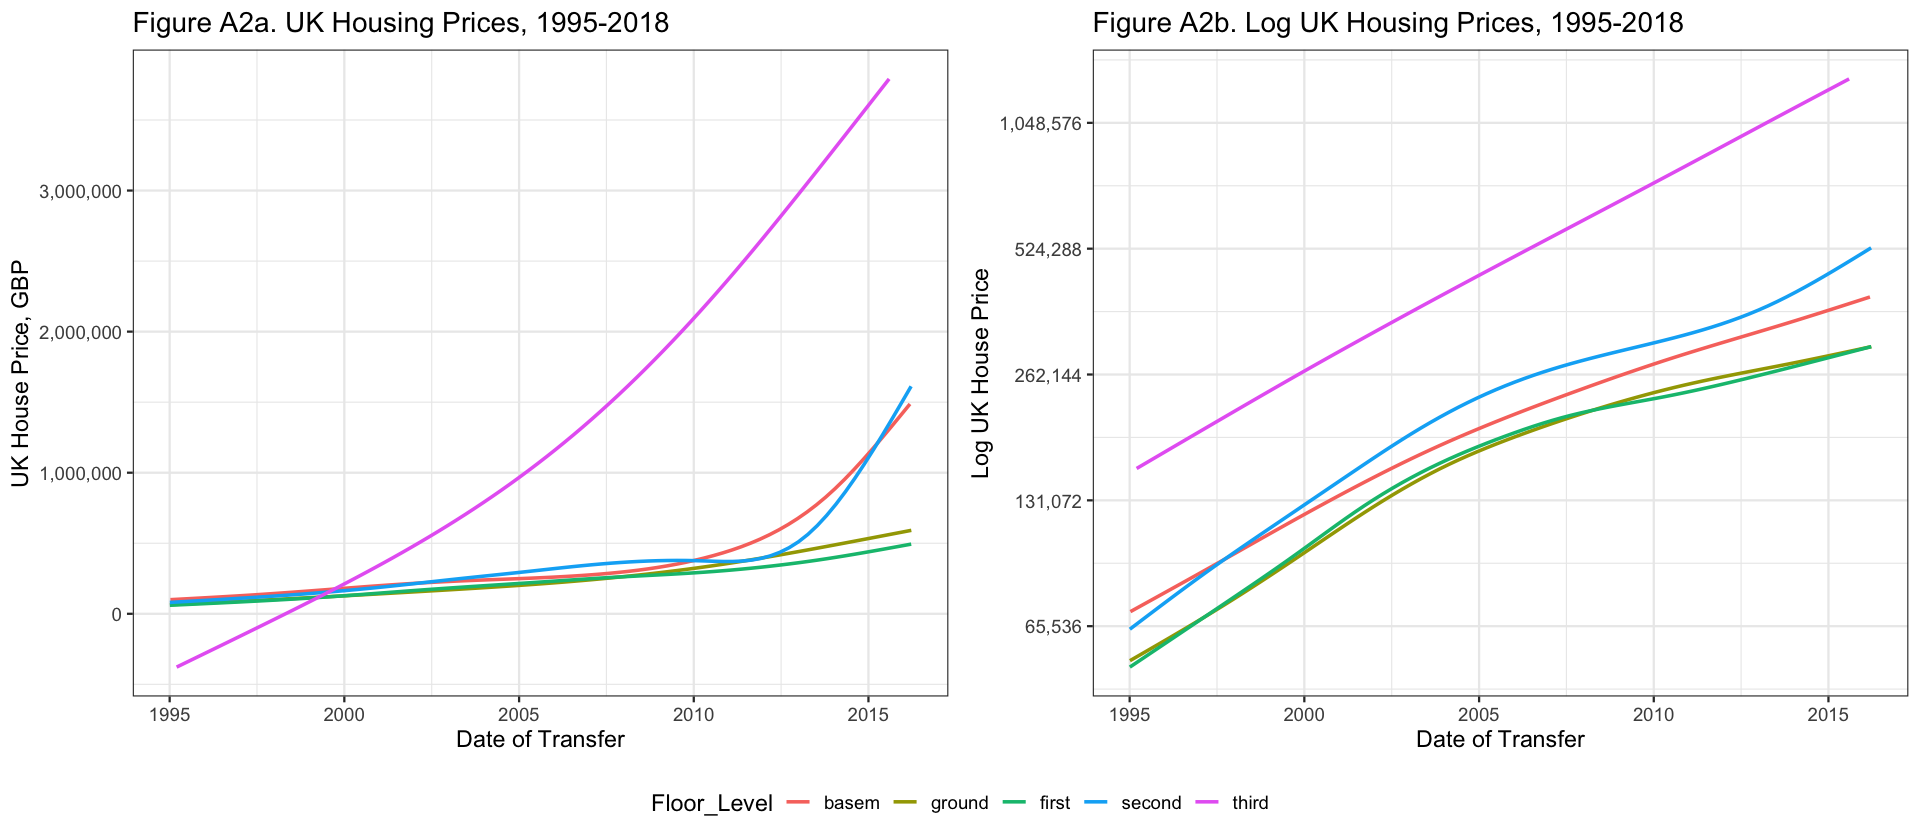

In [52]:
require(scales)

# Plot the created dataframe
floor_plot <- ggplot(df_levels_plot, aes(x=date_of_transfer, y=price, group=Floor_Level, color=Floor_Level)) +
    geom_smooth(formula = y ~ s(x, bs = "cs"), method = 'gam', se = FALSE) +
    xlab("Date of Transfer") +
    theme_bw(base_size = global_size) +
    theme(plot.caption = element_text(hjust = 0))

# Subplots with individual y-labels, titles and y-axis scales
floor_plot1 <- floor_plot + 
    ylab("UK House Price, GBP") + 
    ggtitle("Figure A2a. UK Housing Prices, 1995-2018") +
    scale_y_continuous(labels = comma)
floor_plot2 <- floor_plot + 
    ylab("Log UK House Price") + 
    ggtitle("Figure A2b. Log UK Housing Prices, 1995-2018") +
    scale_y_continuous(trans = "log2", labels = comma)

# Combine subplots into one combined plot (w/o legend)
grid <- plot_grid(floor_plot1 + theme(legend.position="none"), 
                  floor_plot2 + theme(legend.position="none"),
                  align = 'vh',
                  ncol = 2, nrow = 1)

# Extract the legend from one of the plots
legend_b <- get_legend(
  floor_plot1 + guides(color = guide_legend(nrow = 1)) +
    theme(legend.position = "bottom")
)

# Plot both plots with 1 legend on the bottom
plot_grid(grid, legend_b, ncol = 1, rel_heights = c(1, .1))